In [1]:
import pandas as pd
import numpy as np

# Read from pandas

In [19]:
path = "Neural Networks/Introduction to Neural Networks"
data = pd.read_csv(path+'/data/student_data.csv')
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


# show data

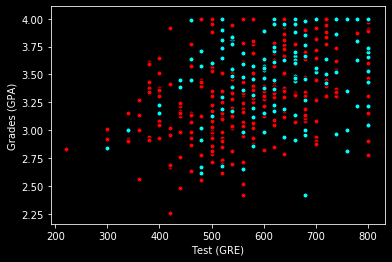

In [27]:
from matplotlib import pyplot as plt

def plot_points(data):
    
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])

    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    

# Plotting the points
plot_points(data)

# Seperate the data rank wise

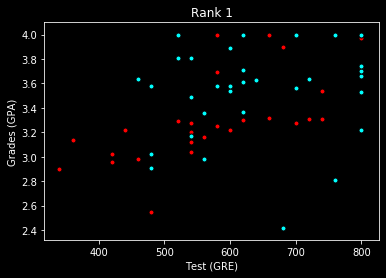

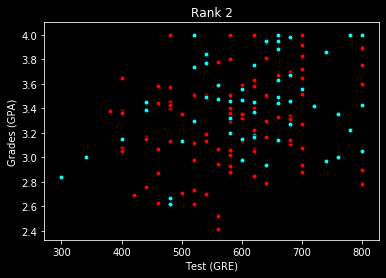

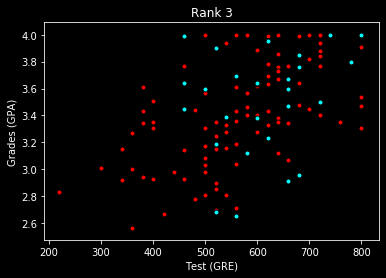

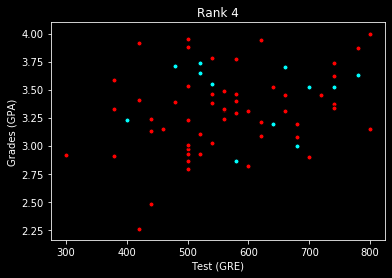

In [29]:
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# plot graph
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

#  One-hot encoding the rank

In [40]:
dummy = pd.get_dummies(data['rank'], prefix='rank')
dummy.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [41]:
one_hot_data = pd.concat([data, dummy], axis=1)
one_hot_data[:10]

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1
5,1,760,3.00,2,0,1,0,0
6,1,560,2.98,1,1,0,0,0
7,0,400,3.08,2,0,1,0,0
8,1,540,3.39,3,0,0,1,0
9,0,700,3.92,2,0,1,0,0


In [57]:
one_hot_data = one_hot_data.drop('rank', axis=1)
one_hot_data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,0.9025,0,0,1,0
1,1,660,0.9175,0,0,1,0
2,1,800,1.0000,1,0,0,0
3,1,640,0.7975,0,0,0,1
4,0,520,0.7325,0,0,0,1


# Scaling the data

In [58]:
processed_data = one_hot_data[:]
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.225625,0,0,1,0
1,1,0.825,0.229375,0,0,1,0
2,1,1.000,0.250000,1,0,0,0
3,1,0.800,0.199375,0,0,0,1
4,0,0.650,0.183125,0,0,0,1
5,1,0.950,0.187500,0,1,0,0
6,1,0.700,0.186250,1,0,0,0
7,0,0.500,0.192500,0,1,0,0
8,1,0.675,0.211875,0,0,1,0
9,0,0.875,0.245000,0,1,0,0


# Splitting the data into Training and Testing

In [59]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data = processed_data.iloc[sample]
test_data = processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre       gpa  rank_1  rank_2  rank_3  rank_4
154      0  0.775  0.230625       0       0       1       0
319      0  0.675  0.205000       1       0       0       0
229      1  0.900  0.213750       0       1       0       0
396      0  0.700  0.190000       0       0       1       0
375      0  0.700  0.218125       0       0       0       1
237      0  0.600  0.250000       0       1       0       0
8        1  0.675  0.211875       0       0       1       0
22       0  0.750  0.176250       0       0       0       1
273      0  0.825  0.207500       1       0       0       0
379      0  0.675  0.168750       0       1       0       0
     admit    gre       gpa  rank_1  rank_2  rank_3  rank_4
7        0  0.500  0.192500       0       1       0       0
12       1  0.950  0.250000       1       0       0       0
13       0  0.875  0.192500       0       1       0       0
26       1  0.775  0.225625       

# Splitting the data into features and targets (labels)

In [60]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features.head()

,gre,gpa,rank_1,rank_2,rank_3,rank_4
154,0.775,0.230625,0,0,1,0
319,0.675,0.205000,1,0,0,0
229,0.900,0.213750,0,1,0,0
396,0.700,0.190000,0,0,1,0
375,0.700,0.218125,0,0,0,1


In [61]:
features_test = train_data.drop('admit', axis=1)
targets_test = train_data['admit']

# Training the 2-layer Neural Network

In [62]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))


def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Backpropagate the error

In [63]:
def error_term_formula(x, y, output):
    return (y - output)*sigmoid_prime(x)

In [64]:
epochs = 1000
learnrate = 0.5

In [65]:
features.shape

(360, 6)

In [66]:
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights

In [67]:
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.27668565573096127
Epoch: 100
Train loss:  0.2087356508151288
Epoch: 200
Train loss:  0.20584769664387842
Epoch: 300
Train loss:  0.20459751173925336
Epoch: 400
Train loss:  0.20387416123047866
Epoch: 500
Train loss:  0.20341021959338235
Epoch: 600
Train loss:  0.20307709463849802
Epoch: 700
Train loss:  0.20281202429921277
Epoch: 800
Train loss:  0.2025838359518334
Epoch: 900
Train loss:  0.2023766776588187
Finished training!


In [68]:
# Calculating the Accuracy

In [69]:
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.692
